In [9]:
# 分析用
import numpy as np

# プロット用
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習用
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

# データ
X = np.load('n73-x.npy')
y = np.load('n73-y.npy')

In [10]:
print(X, y)
print(len(X), len(X[0]), len(y))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [0 0 0 ... 0 0 1]
10661 8289 10661


In [19]:
ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,
                  test_size=0.2,
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

8528 2133
8528 8528


In [20]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

8528 2133
8528 2133


In [12]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9207317073170732

In [13]:
clf.score(X_test, y_test)

0.7393342709798406

In [14]:
clf.predict(X_test)

array([1, 1, 0, ..., 0, 0, 1])

In [16]:
X_test_value = clf.decision_function(X_test)
X_test_value

array([ 0.36634371,  1.89678282, -2.67017915, ..., -0.7009883 ,
       -4.37487974,  4.28666046])

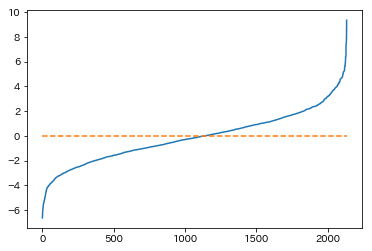

In [22]:
plt.plot(np.sort(X_test_value))
plt.plot([0, 2133], [0, 0], linestyle='--')

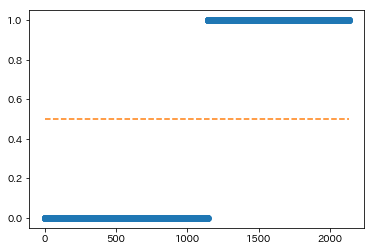

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# plt.plot(np.sort(sigmoid(X_test_value)))
plt.plot(np.sort(clf.predict(X_test)),"o")

plt.plot([0, 2133], [0.5, 0.5], linestyle='--')
